## Importância da Utilização do PCA no Contexto de Pré-processamento, Gráficos 3D e Clusterização

### O Papel do PCA
O **Principal Component Analysis (PCA)** é uma técnica de redução de dimensionalidade que transforma um conjunto de variáveis possivelmente correlacionadas em um conjunto de variáveis linearmente não correlacionadas, conhecidas como componentes principais. A utilização do PCA é crucial em projetos de clusterização de clientes, especialmente quando estamos trabalhando com dados de alta dimensionalidade. 
[PCA - Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Importância do PCA neste Projeto

1. **Redução de Dimensionalidade**: O PCA ajuda a reduzir o número de variáveis no conjunto de dados, mantendo a maior parte da variação presente nos dados originais. Isso simplifica a análise, diminui o tempo de processamento e pode melhorar o desempenho dos algoritmos de clusterização.

2. **Visualização em 3D**: Ao reduzir a dimensionalidade dos dados para 3 componentes principais, podemos criar gráficos 3D que permitem uma visualização mais clara dos clusters, ajudando a identificar padrões e sobreposições que não seriam aparentes em gráficos 2D.

3. **Eliminação de Ruído**: O PCA remove a redundância e o ruído dos dados, focando apenas nas variáveis que realmente contribuem para a variação dos dados. Isso resulta em clusters mais distintos e interpretáveis.

4. **Melhoria da Precisão dos Modelos**: Ao remover correlações e reduzir a dimensionalidade, o PCA pode melhorar a precisão e a eficiência dos modelos de clusterização, evitando problemas de overfitting e subfitting.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

os.environ["OMP_NUM_THREADS"] = "1"

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df =pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Implementação do PCA

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age","Annual Income (k$)","Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=3, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [4]:
import joblib

joblib.dump(pipeline, "../modelos/pipeline_preprocessing_pca_clustering.pkl")

['../modelos/pipeline_preprocessing_pca_clustering.pkl']

In [5]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [6]:
pipeline["clustering"].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [7]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


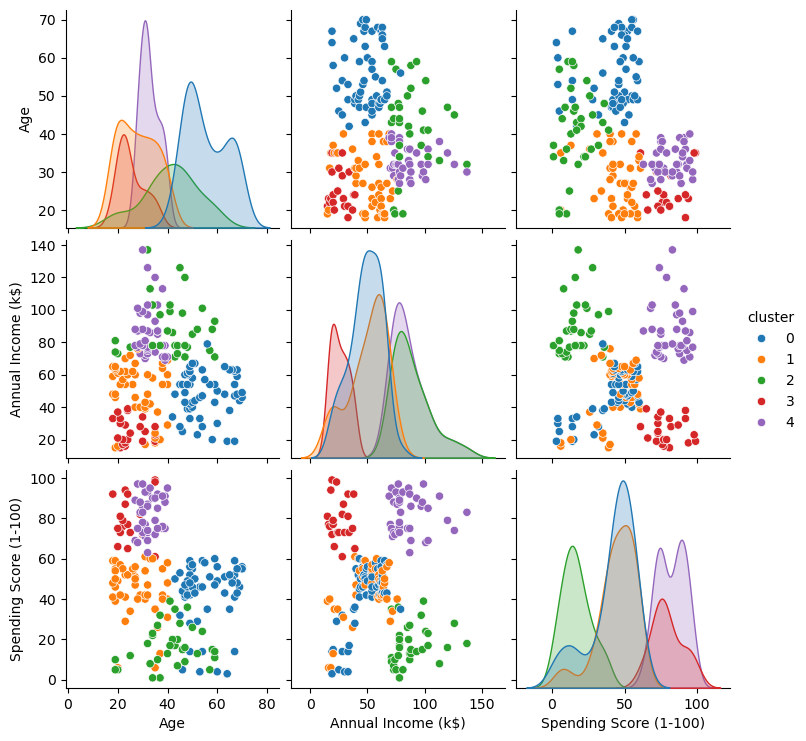

In [8]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");
plt.savefig("../imagens/pairplot.png")

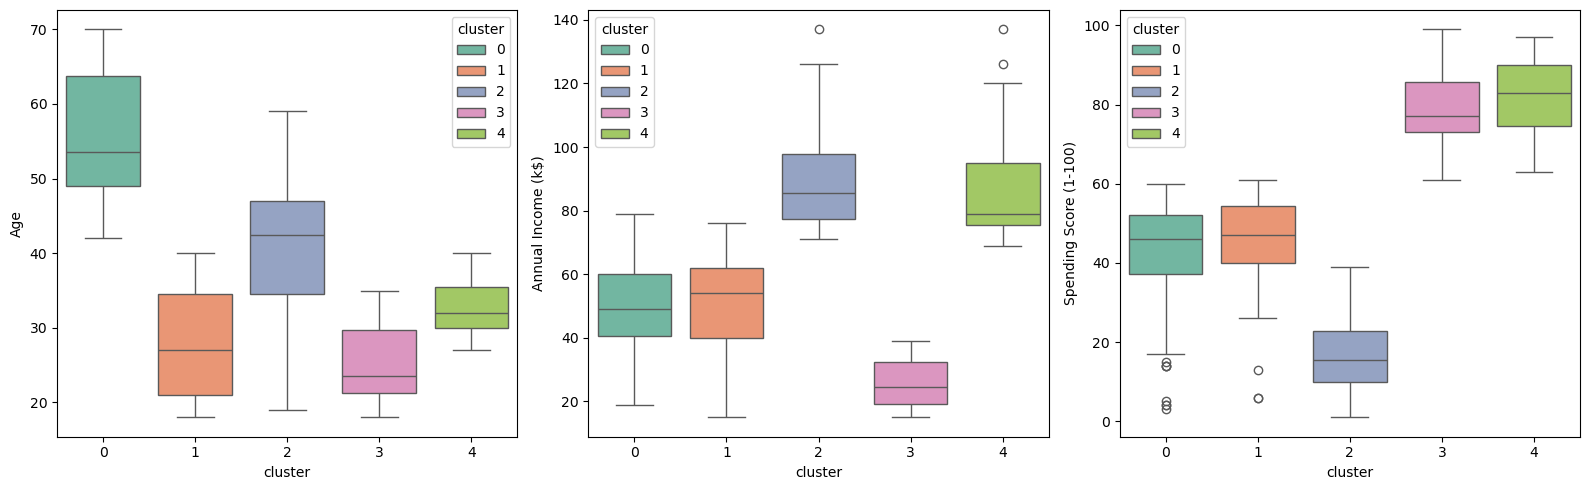

In [9]:
palette = sns.color_palette("Set2", n_colors=5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, hue="cluster", ax=ax, palette=palette)
    
plt.savefig("../imagens/subplot.png")
plt.show()

In [10]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    58
1    47
2    34
3    22
4    39
Name: count, dtype: int64

In [11]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    33
         Male      25
1        Female    31
         Male      16
2        Female    14
         Male      20
3        Female    13
         Male       9
4        Female    21
         Male      18
dtype: int64

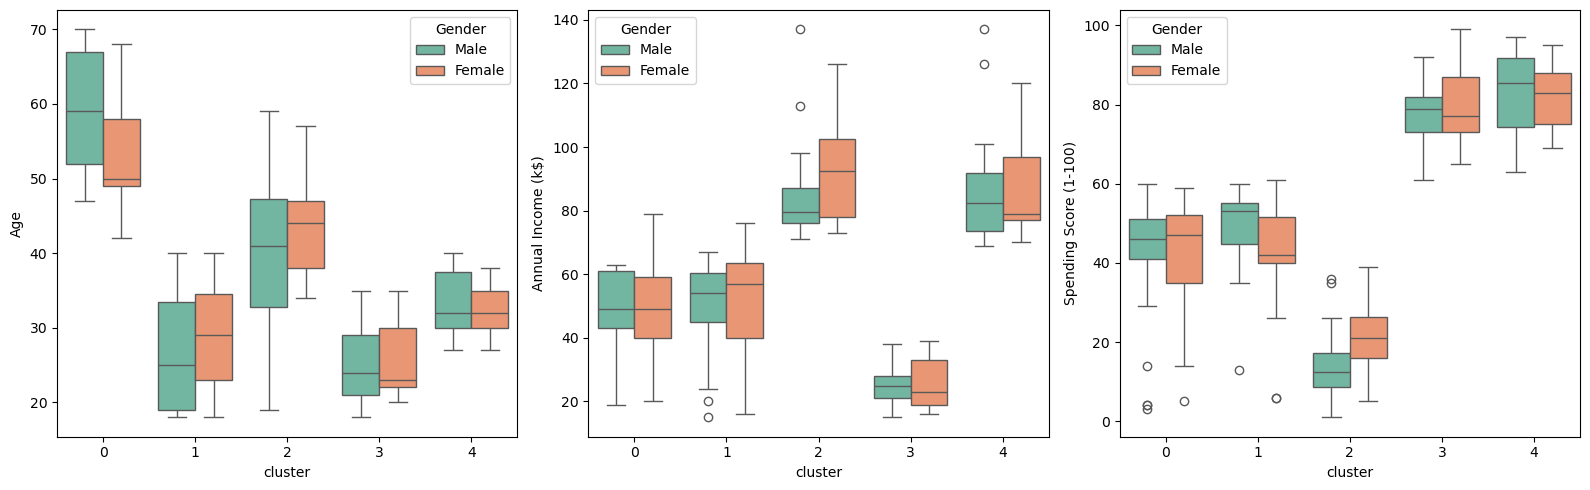

In [12]:
palette = sns.color_palette("Set2", n_colors=2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, hue="Gender", ax=ax, palette=palette)
      

plt.show()

In [13]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [14]:
pipeline["pca"].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [-0.70661643, -0.00434967, -0.70753413,  0.00590595, -0.00590595]])

In [15]:
pipeline["pca"].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [16]:
pipeline["clustering"].cluster_centers_

array([[ 1.09281997, -0.42702742, -0.61346816],
       [-0.39283157, -0.42287385,  0.70807382],
       [ 1.00944112,  1.11828568,  0.78954352],
       [-1.4357643 , -1.37856558, -0.10638215],
       [-1.2219143 ,  0.94742028, -0.56929202]])

In [17]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684


In [18]:
centroids = pipeline["clustering"].cluster_centers_

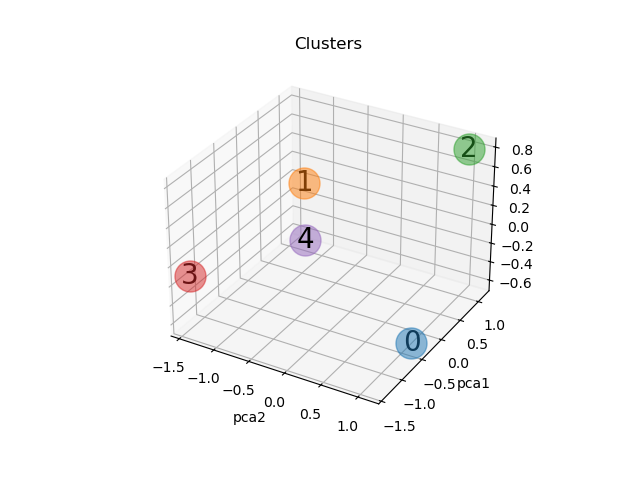

In [19]:
%matplotlib ipympl
from funcoes_auxiliares import visualizar_cluster

visualizar_cluster(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids
)

plt.savefig("../imagens/cluster.png")

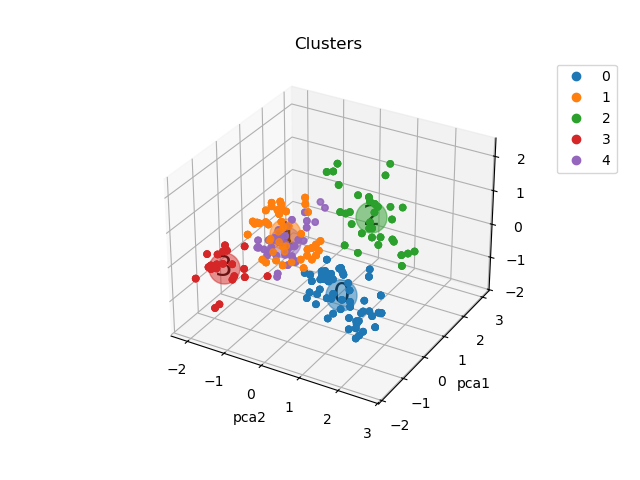

In [20]:
%matplotlib ipympl
from funcoes_auxiliares import visualizar_cluster

visualizar_cluster(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]
)

## Conclusão do Projeto de Clusterização de Clientes

### Resumo dos Principais Aspectos e Resultados

Neste projeto, realizamos uma análise detalhada dos dados de clientes, aplicando técnicas de pré-processamento, visualização e clusterização. Utilizamos gráficos 2D e 3D para interpretar melhor a distribuição dos clusters e identificar padrões e correlações. Implementamos a redução de dimensionalidade com PCA para melhorar a qualidade dos clusters e facilitar a visualização.

### Descrição dos Clusters Antes do PCA

| Pontuação de Gastos | Renda   | Idade    | Cluster |
|---------------------|---------|----------|---------|
| Alta                | Alta    | Jovem    | 0       |
| Moderada            | Moderada| Alta     | 1       |
| Alta                | Baixa   | Jovem    | 2       |
| Baixa               | Alta    | Moderada | 3       |
| Moderada            | Moderada| Jovem    | 4       |

### Análise dos Resultados

Após aplicar o PCA, identificamos os seguintes padrões nos clusters:

### Tabela de Resultados

| Cluster | Idade                      | Renda Anual | Score de Gastos         | Observações                                                                                   |
|---------|----------------------------|-------------|------------------------|----------------------------------------------------------------------------------------------|
| 4       | 30 a 40 anos               | Alta        | Alta                   | Clientes com maiores scores, rendas anuais elevadas, demonstrando maior estabilidade financeira. |
| 3       | Menos de 30 anos           | Baixa       | Alta                   | O menor cluster, com menor renda anual, mas scores elevados, quase no nível do Cluster 4.     |
| 2       | 35 a 50 anos               | Alta        | Menor                  | Clientes com alta renda anual, mas scores menores, indicando possível falta de crédito.      |
| 0       | Acima de 50 até 60 anos    | Moderada    | Moderado               | Representam a maior parte dos clientes, com rendas anuais e scores muito semelhantes ao Cluster 1. |
| 1       | Maior que 20 até 35 anos   | Moderada    | Moderado               | Representam a maior parte dos clientes, com rendas anuais e scores muito semelhantes ao Cluster 0. |

- **Cluster 4**: Clientes com maiores scores, rendas anuais elevadas e idades entre 30 e 40 anos. Este grupo demonstra maior estabilidade financeira.
- **Cluster 3**: O menor cluster, composto por clientes com menos de 30 anos, menor renda anual, mas scores elevados, quase no nível do Cluster 4.
- **Cluster 2**: Clientes com idades entre 35 e 50 anos, alta renda anual, mas scores menores, o que pode indicar uma falta de crédito.
- **Cluster 0 e 1**: Representam a maior parte dos clientes, com idades variadas, mas rendas anuais e scores muito semelhantes.

### Conclusão Final

Através desta análise, conseguimos segmentar os clientes em grupos distintos, facilitando a compreensão dos diferentes perfis de consumidores. Essas informações são valiosas para estratégias de marketing, crédito e tomada de decisões empresariais. A utilização de técnicas avançadas como PCA e visualizações 3D permitiu uma análise mais precisa e detalhada dos dados, revelando padrões importantes que não seriam aparentes em uma análise superficial.

O projeto demonstrou a importância do pré-processamento, da redução de dimensionalidade e da visualização avançada na análise de dados de clientes, proporcionando insights valiosos e acionáveis.
